In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt 

from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("pollution.csv")
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
for col in ["No", 'year', 'month', 'day', 'pm2.5_new']:
    df.drop(col, axis = 1, inplace = True, errors = 'ignore')

In [5]:
df.head()

,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
df.columns = ['Hour', 'PM25', 'Dew', 'Temperature', 'Pressure', 'WindDirection', 'WindSpeed', 'Snow', 'Rain']
df.head()

,Hour,PM25,Dew,Temperature,Pressure,WindDirection,WindSpeed,Snow,Rain
0,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [7]:
df.describe()

,Hour,PM25,Dew,Temperature,Pressure,WindSpeed,Snow,Rain
count,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


<AxesSubplot:>

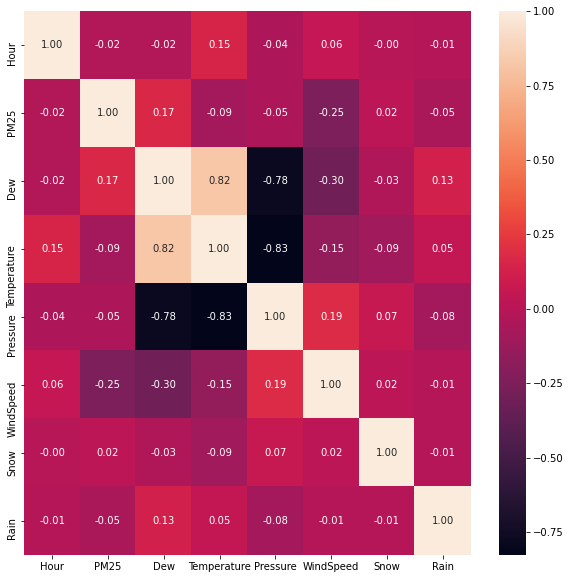

In [8]:
#remove the empty values
corr_matrix = df.corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, vmax = 1.0, fmt = ".2f", annot = True)

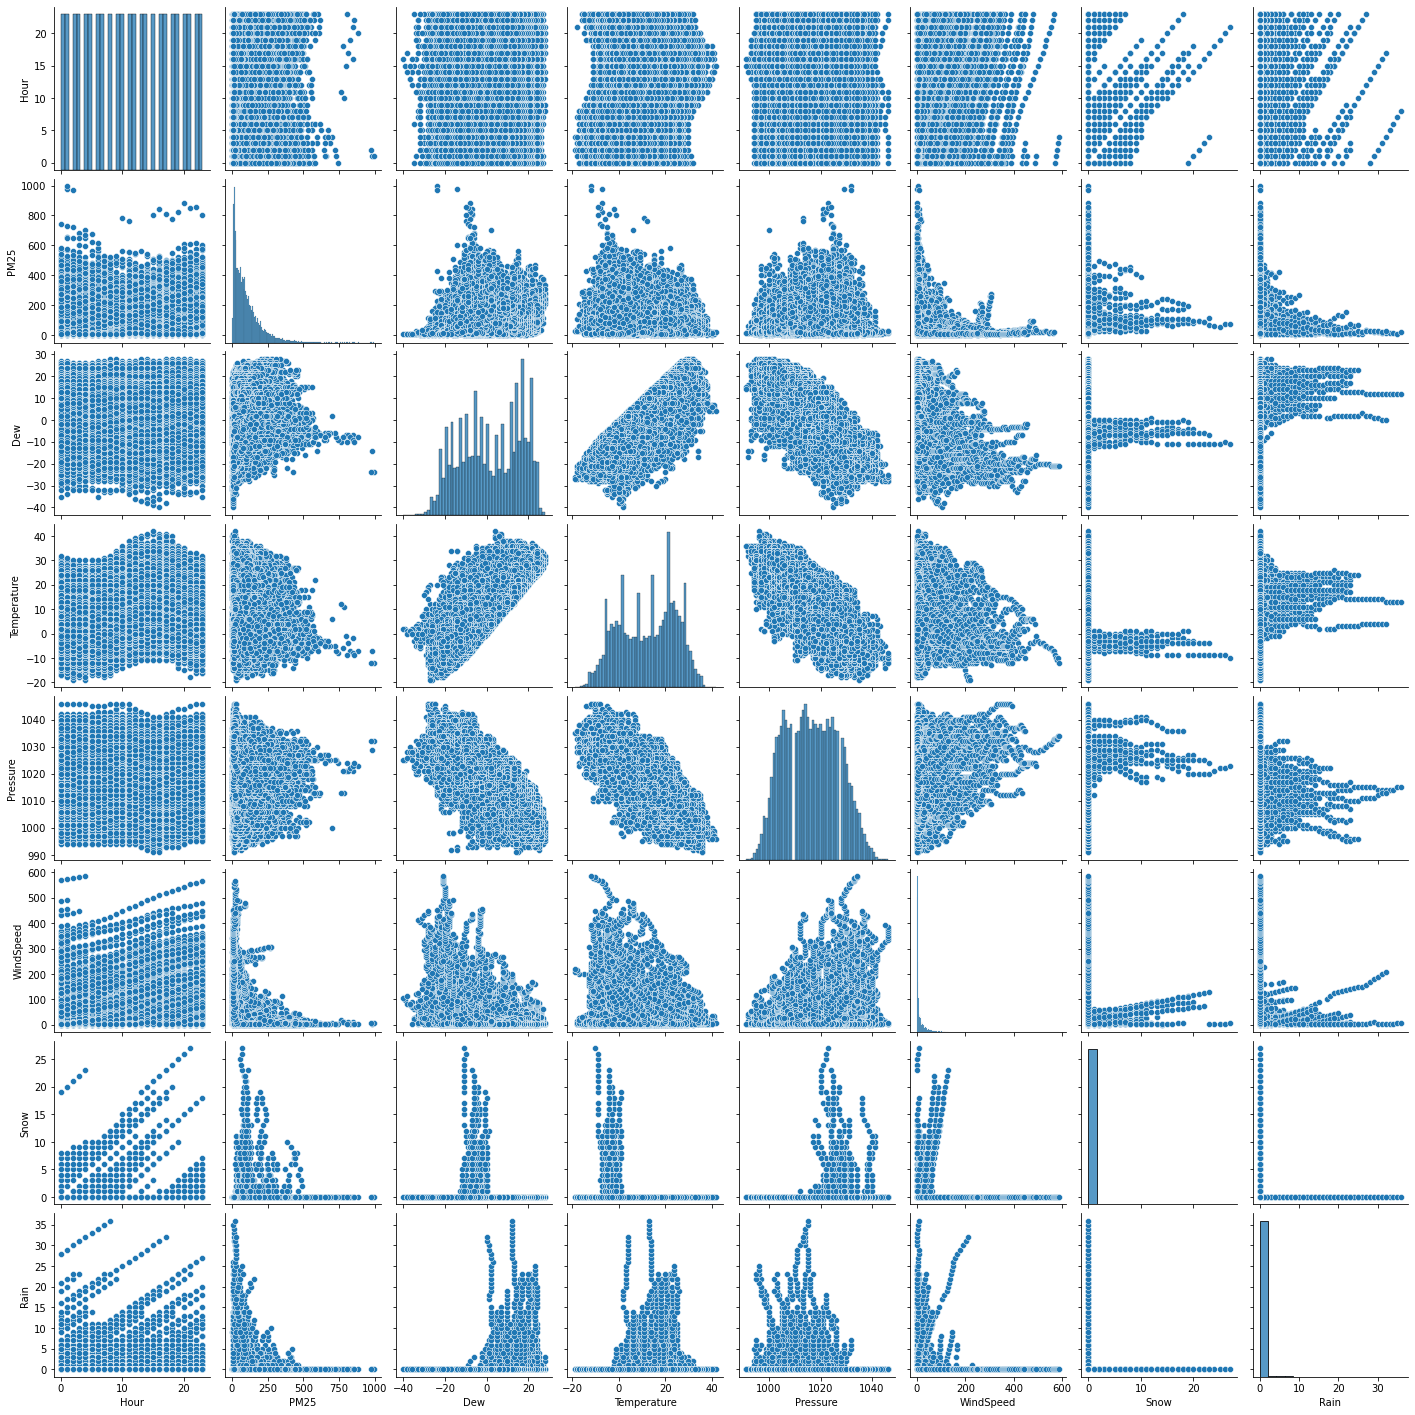

In [9]:
pairplot = sns.pairplot(df)

In [11]:
 labelencoder = LabelEncoder()
 df['WinDirection'] = labelencoder.fit_transform(df['WindDirection'])

 min_max_scaler = MinMaxScaler()

 for col in df.columns:

     if col == "PM25":
         continue

     else:
         df[col] = min_max_scaler.fit_transform(df[[col]])

ValueError: could not convert string to float: 'NW'

In [ ]:
df.head()